# PREDICTIVE ANALYTICS - ASSIGNMENT 3

M.Q Maffa - 217042432

Forcasting Facebook stock price using data from 2004 - 2024

**Read facebook(META) stock data from A CSV FILE (2004 - 2024)**

In [13]:
import pandas as pd

# Load the stock data from the CSV file
csv_file_path = 'facebook_stock.csv'
df = pd.read_csv(csv_file_path, index_col='Date', parse_dates=True)

# Display the DataFrame
print("\nDataFrame format:\n")
print(df.head())



DataFrame format:

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151604  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


**Set the date as index**

In [14]:
# Sort the DataFrame by the index (Date) in ascending order
df.sort_index(inplace=True)

# Display the first few records
print(df.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151604  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


**Data Cleaning - Handle missing values (imputation or removal)**

In [15]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

df.fillna(0, inplace=True)

# Display the DataFrame after imputation
print(df.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151604  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


**Removing Missing Values**

In [16]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Display the DataFrame after removing rows with missing data
print(df.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151604  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


**Drop columns with missing values**

In [17]:
# Drop columns with any missing values
df.dropna(axis=1, inplace=True)

# Display the DataFrame after removing columns with missing data
print(df.head())


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.151604  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  33.960213  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  30.936428  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  31.934378   73600000
2012-05-24  32.950001  33.209999  31.770000  33.029999  32.962265   50237200


**Visualize the Time Series Data**

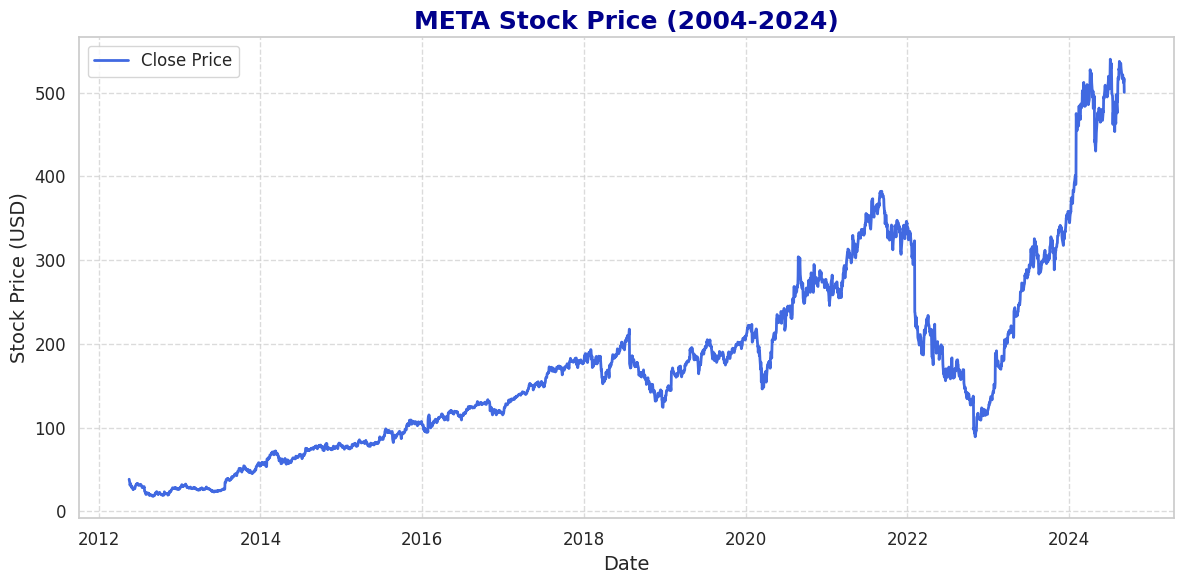

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Close'], label='Close Price', color='royalblue', linewidth=2)

plt.title(f'{ticker} Stock Price (2004-2024)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()

plt.show()


**Visualize the data using a heatmap**

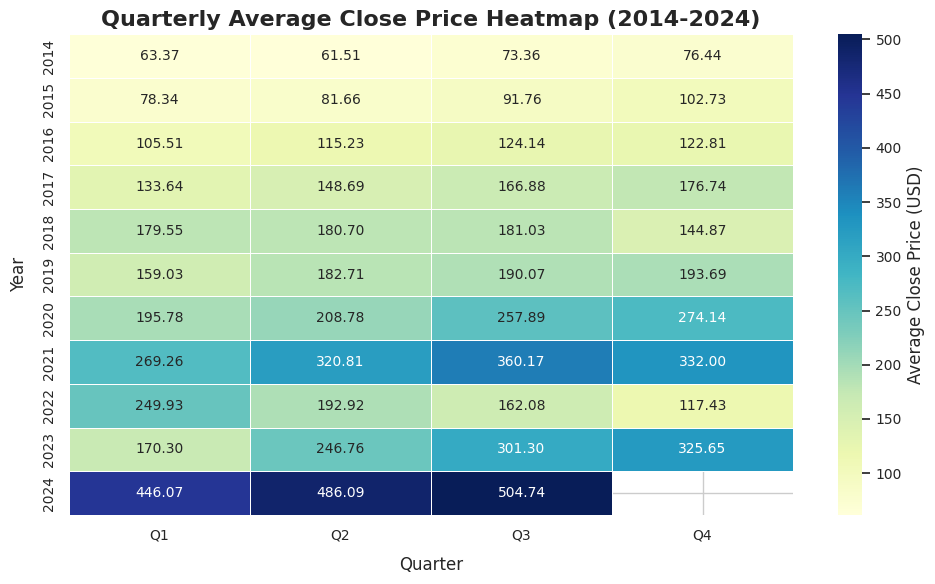

In [19]:

df.index = pd.to_datetime(df.index)

df = df[df.index.year >= 2014].copy()

df.loc[:, 'Year'] = df.index.year
df.loc[:, 'Quarter'] = df.index.to_period('Q')

pivot_df = df.pivot_table(values='Close', index='Year', columns=df.index.quarter, aggfunc='mean')
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
pivot_df.columns = quarters

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    pivot_df,
    cmap='YlGnBu',
    annot=True,
    fmt='.2f',
    linewidths=.5,
    annot_kws={"size": 10},
    cbar_kws={'label': 'Average Close Price (USD)'}
)

plt.title('Quarterly Average Close Price Heatmap (2014-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12, labelpad=10)
plt.ylabel('Year', fontsize=12, labelpad=10)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


**Descriptive Statistics**

In [20]:
# Select only numeric columns for descriptive statistics
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Descriptive Statistics
desc_stats = numeric_df.describe().round(2)

# Skewness and Kurtosis
skewness = numeric_df.skew().round(2)
kurtosis = numeric_df.kurtosis().round(2)

# Mode (first mode)
mode = numeric_df.mode().iloc[0].round(2)

combined_stats = pd.DataFrame({
    'Mean': desc_stats.loc['mean'],
    'Std Dev': desc_stats.loc['std'],
    'Min': desc_stats.loc['min'],
    '25%': desc_stats.loc['25%'],
    'Median (50%)': desc_stats.loc['50%'],
    '75%': desc_stats.loc['75%'],
    'Max': desc_stats.loc['max'],
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Mode': mode
})

print(combined_stats)


                  Mean      Std Dev         Min          25%  Median (50%)  \
Open            197.16       107.92       54.02       118.11        174.80   
High            199.71       109.35       54.94       118.99        176.94   
Low             194.70       106.55       51.85       116.94        172.62   
Close           197.26       107.95       53.53       118.00        174.81   
Adj Close       196.89       107.83       53.42       117.75        174.45   
Volume     25511460.38  17591468.04  5467500.00  15202275.00   20518450.00   

                   75%           Max  Skewness  Kurtosis         Mode  
Open            260.34  5.423500e+02      1.14      0.98       190.00  
High            265.04  5.442300e+02      1.14      0.97       180.50  
Low             256.58  5.285900e+02      1.14      0.97       141.27  
Close           261.12  5.399100e+02      1.14      0.97        80.67  
Adj Close       260.58  5.399100e+02      1.15      0.98        80.50  
Volume     29464825.0

**Visualize Data with a Scatter Plot**

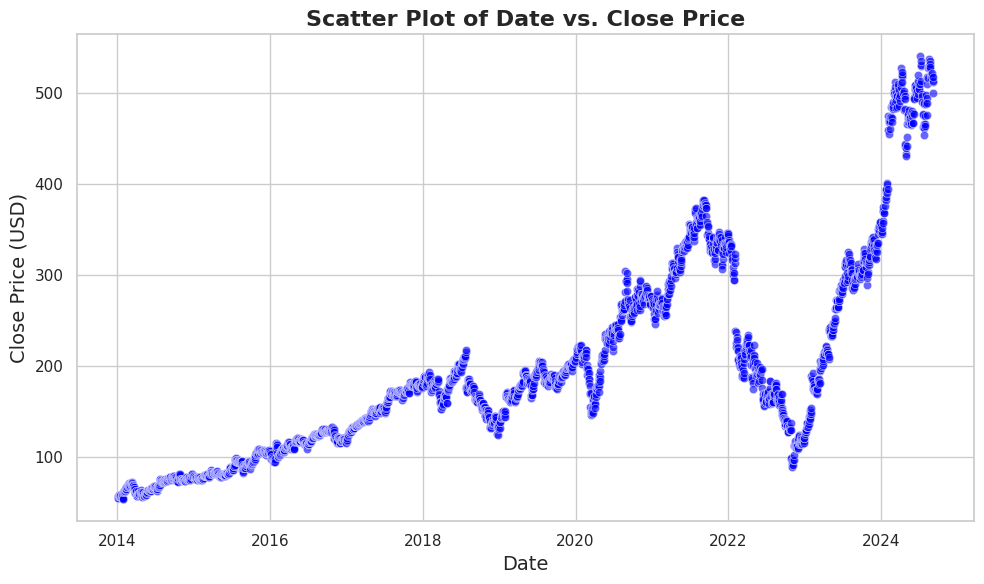

In [24]:

df = df[['Close']].dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y='Close', data=df, color='blue', alpha=0.6)
plt.title('Scatter Plot of Date vs. Close Price', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)

plt.grid(True)

plt.tight_layout()
plt.show()

**Stationarity Testing**

In [25]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.24054255078306022
p-value: 0.9744459988173437
Critical Values: {'1%': -3.432794204326531, '5%': -2.862619868040959, '10%': -2.567344850230434}


**KPSS Test**

In [26]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(df['Close'], regression='c')
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])


KPSS Statistic: 5.492278942852248
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-26-8b675082f29b>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df['Close'], regression='c')


**Seasonality Testing**

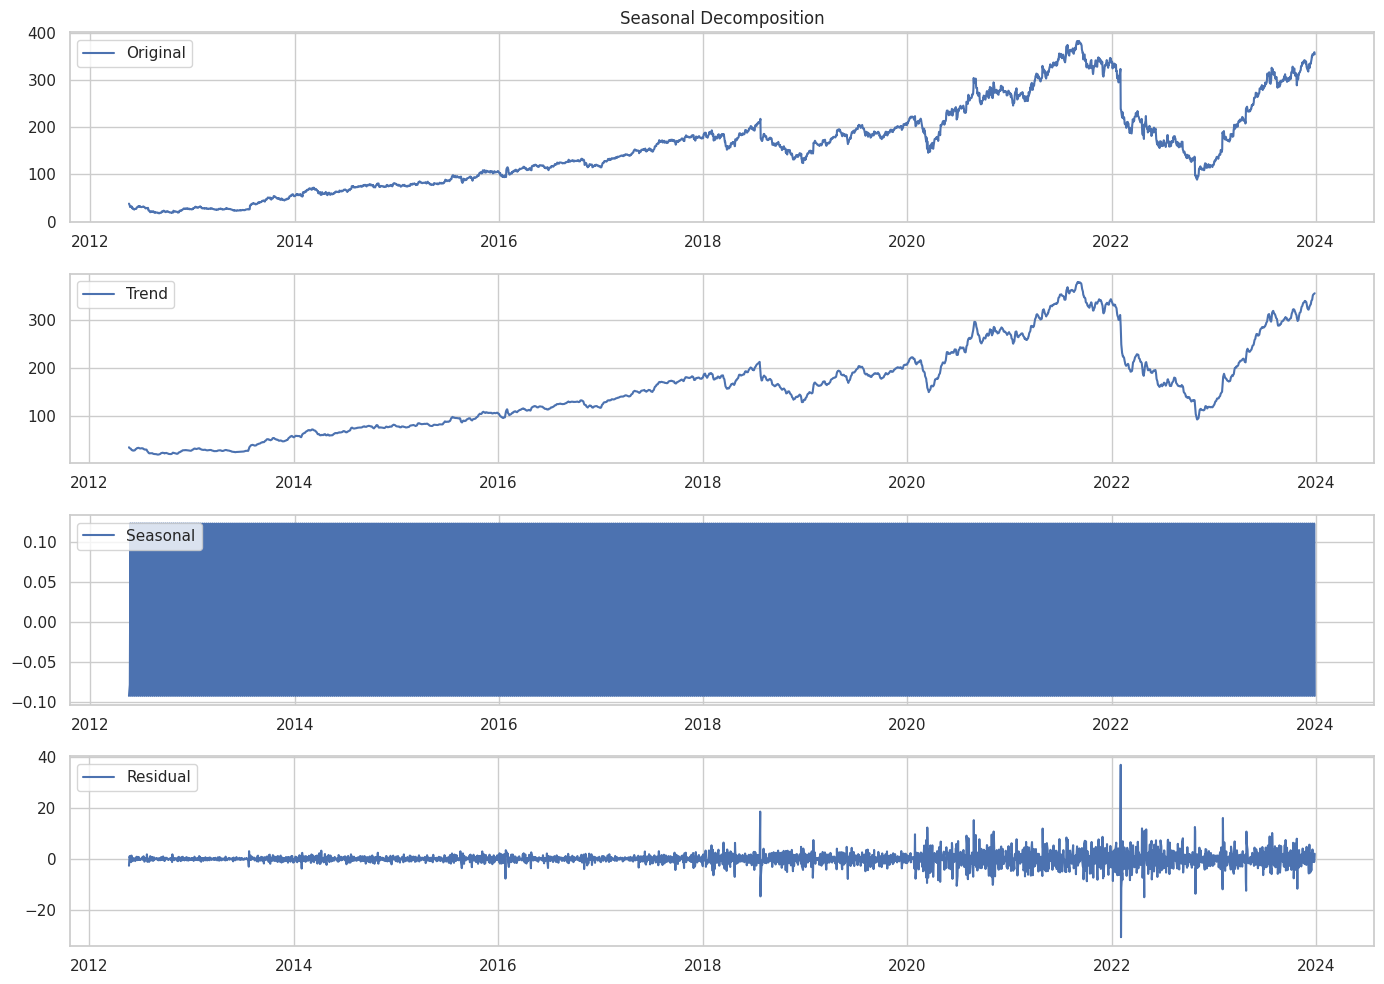

In [27]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.DataFrame(stock_data)
df = df[['Close']]

df.index = pd.to_datetime(df.index)

df = df.asfreq('B')

df.ffill(inplace=True)


result = seasonal_decompose(df['Close'], model='additive')

plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Augmented Dickey-Fuller**

In [28]:
from statsmodels.tsa.stattools import adfuller

df.index = pd.to_datetime(df.index)

df = df.asfreq('B')

df.ffill(inplace=True)

result = adfuller(df['Close'])

adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
num_obs = result[3]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Number of Lags Used: {used_lag}')
print(f'Number of Observations Used: {num_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value}')

# Interpretation
if p_value < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')


ADF Statistic: -0.7617216660864677
p-value: 0.8301083348788223
Number of Lags Used: 22
Number of Observations Used: 3008
Critical Values:
  1%: -3.4325258275369457
  5%: -2.8625013404272086
  10%: -2.567281746623366
The time series is not stationary.


**Estimating ARIMA Model Parameters**

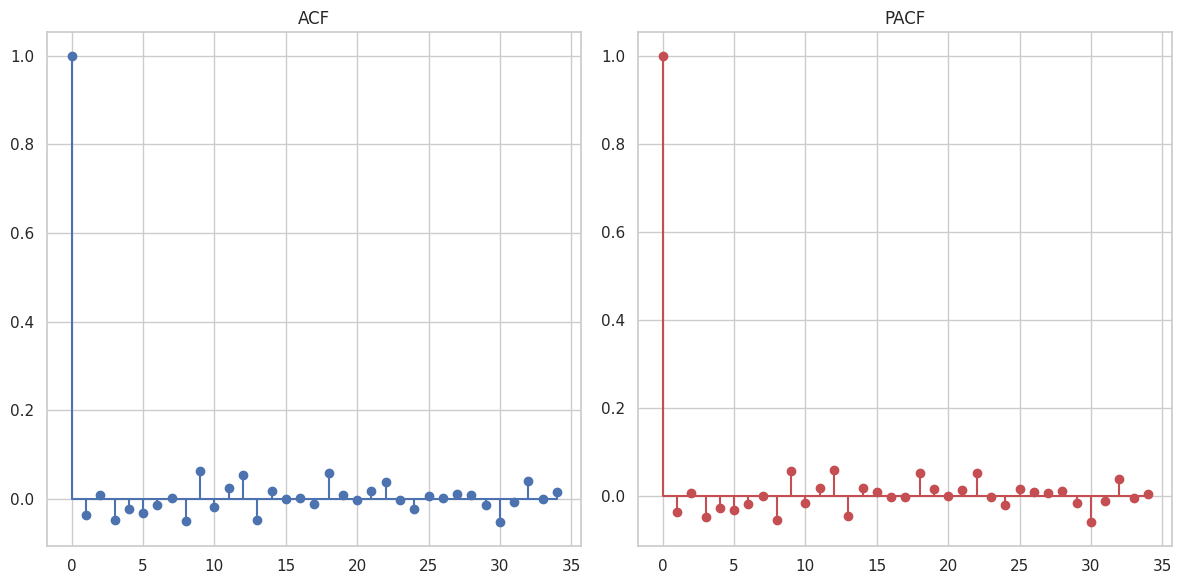

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3030
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8660.020
Date:                Tue, 10 Sep 2024   AIC                          17326.040
Time:                        16:26:00   BIC                          17344.088
Sample:                    05-21-2012   HQIC                         17332.528
                         - 12-29-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5528      0.191     -2.894      0.004      -0.927      -0.178
ma.L1          0.5171      0.197      2.622      0.009       0.131       0.904
sigma2        17.8175      0.081    220.729      0.0

In [29]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

# Convert to DataFrame and use only the 'Close' price
df = pd.DataFrame(stock_data)
df = df[['Close']]


df.index = pd.to_datetime(df.index)

df = df.asfreq('B')

df.ffill(inplace=True)

result = adfuller(df['Close'])
p_value = result[1]

# If p-value > 0.05, differencing is needed
if p_value > 0.05:
    df['Close_diff'] = df['Close'].diff().dropna()
    df = df.dropna()

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plt.stem(acf(df['Close_diff']), linefmt='b-', markerfmt='bo', basefmt='b-')
plt.title('ACF')

# PACF
plt.subplot(1, 2, 2)
plt.stem(pacf(df['Close_diff']), linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('PACF')

plt.tight_layout()
plt.show()

model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


**ARIMA Forcasting**

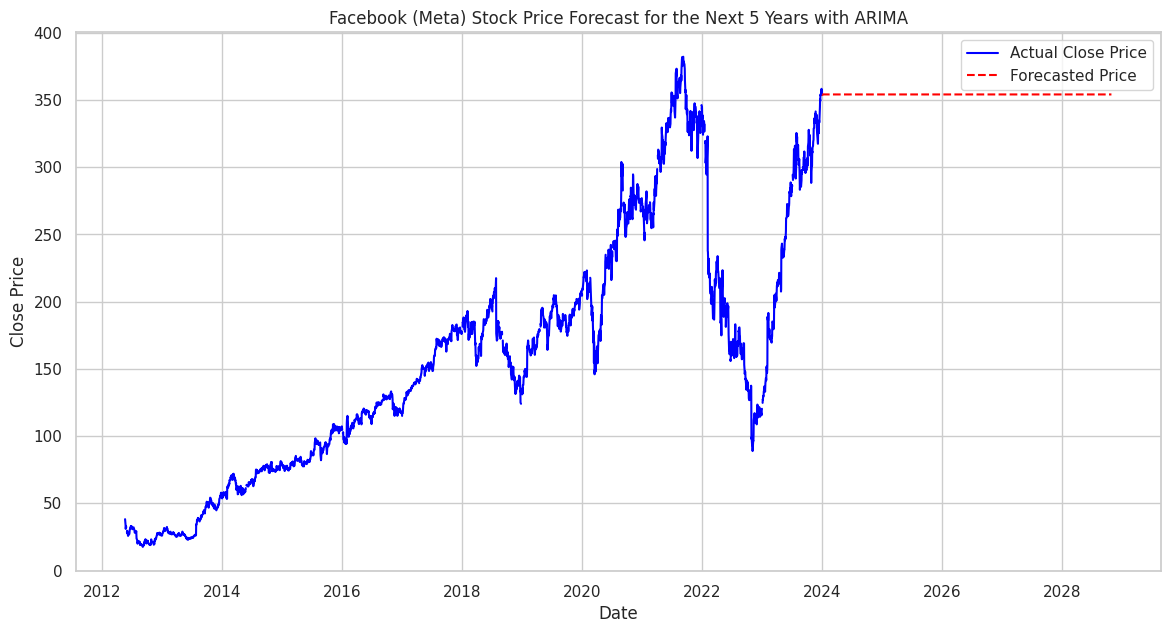

Forecasted Values:
            Forecasted
Date                  
2024-01-01  353.981679
2024-01-02  353.821453
2024-01-03  353.933448
2024-01-04  354.028294
2024-01-05  354.176091


In [31]:
from statsmodels.tsa.arima.model import ARIMA


df = df[['Close']]

df.ffill(inplace=True)

df = df.asfreq('B')

# Fit ARIMA model
model = ARIMA(df, order=(5, 1, 0))
model_fit = model.fit()

forecast_periods = 5 * 252
forecast = model_fit.forecast(steps=forecast_periods)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted': forecast
}).set_index('Date')

plt.figure(figsize=(14, 7))

# Plot the actual data
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')

# Plot the forecasted data
plt.plot(forecast_df.index, forecast_df['Forecasted'], color='red', linestyle='--', label='Forecasted Price')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Facebook (Meta) Stock Price Forecast for the Next 5 Years with ARIMA')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Values:")
print(forecast_df.head())


**Exponential Smoothing Forcasting**

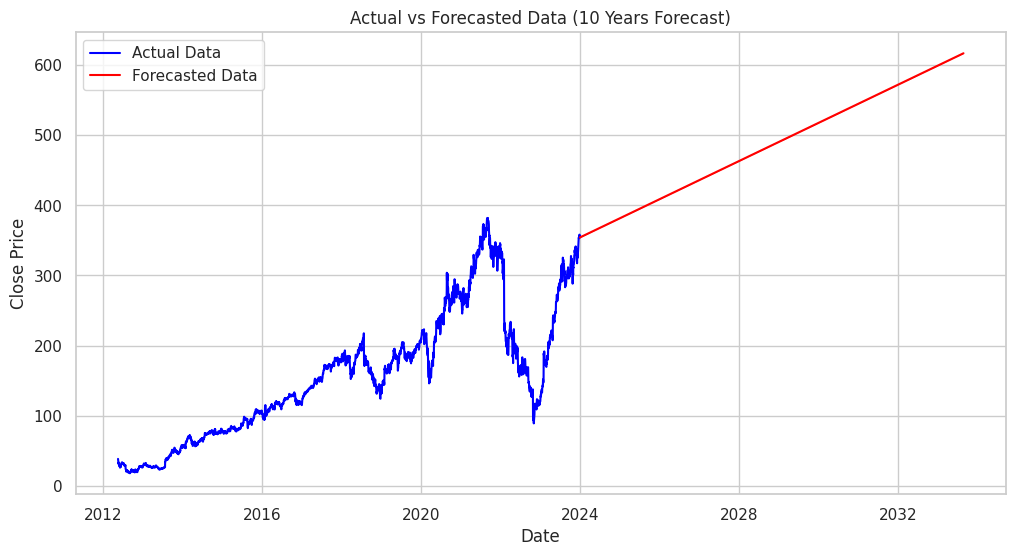

Forecasted Values:
2024-01-01    354.219285
2024-01-02    354.399522
2024-01-03    354.619906
2024-01-04    354.656161
2024-01-05    354.624834
Freq: B, dtype: float64


In [33]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

df = pd.DataFrame(stock_data)
df = df[['Close']]

df.index = pd.to_datetime(df.index)
df = df.asfreq('B')

df['Close'].ffill(inplace=True)

# Set the seasonal period
seasonal_periods = 5

# Fit the Exponential Smoothing model
model = ExponentialSmoothing(df['Close'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

forecast_steps = 2520
forecast = fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual Data', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='B')[1:], forecast, label='Forecasted Data', color='red')
plt.title('Actual vs Forecasted Data (10 Years Forecast)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Values:")
print(forecast.head())


**Splitting the Data**

In [36]:

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Check if 'Volume' exists before creating lagged features
if 'Volume' in df.columns:
    # Create lagged features
    df['Previous_Close'] = df['Close'].shift(1)
    df['Previous_Volume'] = df['Volume'].shift(1)
else:

    df['Previous_Close'] = df['Close'].shift(1)

df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Drop rows with NaN values resulting from shift and rolling operations
df.dropna(inplace=True)

features = ['Previous_Close', 'Previous_Volume', 'MA_5', 'MA_10']

features = [f for f in features if f in df.columns]
X = df[features]
y = df['Close']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
            Previous_Close    MA_5   MA_10
Date                                      
2012-05-31       28.190001  30.090  31.874
2012-06-01       29.600000  29.252  30.823
2012-06-04       27.719999  28.250  30.110
2012-06-05       26.900000  27.656  29.597
2012-06-06       25.870001  27.380  29.078

Target (y):
Date
2012-05-31    29.600000
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
Freq: B, Name: Close, dtype: float64


**Split the Data into Training and Testing Sets**

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Set Size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training Set Size: X_train: (2417, 3), y_train: (2417,)
Testing Set Size: X_test: (605, 3), y_test: (605,)


**Train the Model**

In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Evaluate the Model**

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 25.83
R-squared: 1.00


**Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Model intercept**

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
print(f"Intercept: {intercept}")


Intercept: 0.2041052597841997


**Fit the regression line**

<ipython-input-43-a87131339daf>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.ffill(inplace=True)


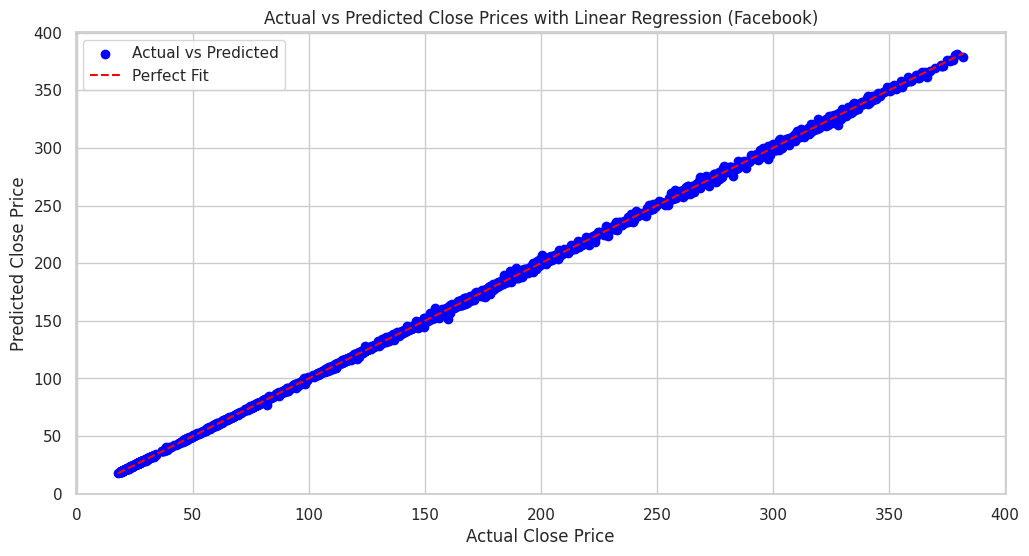

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df = pd.DataFrame(stock_data)

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X.ffill(inplace=True)
y.ffill(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)


plt.figure(figsize=(12, 6))

plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')


plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Prices with Linear Regression (Facebook)')
plt.legend()

plt.show()


**kNN Forecasting**

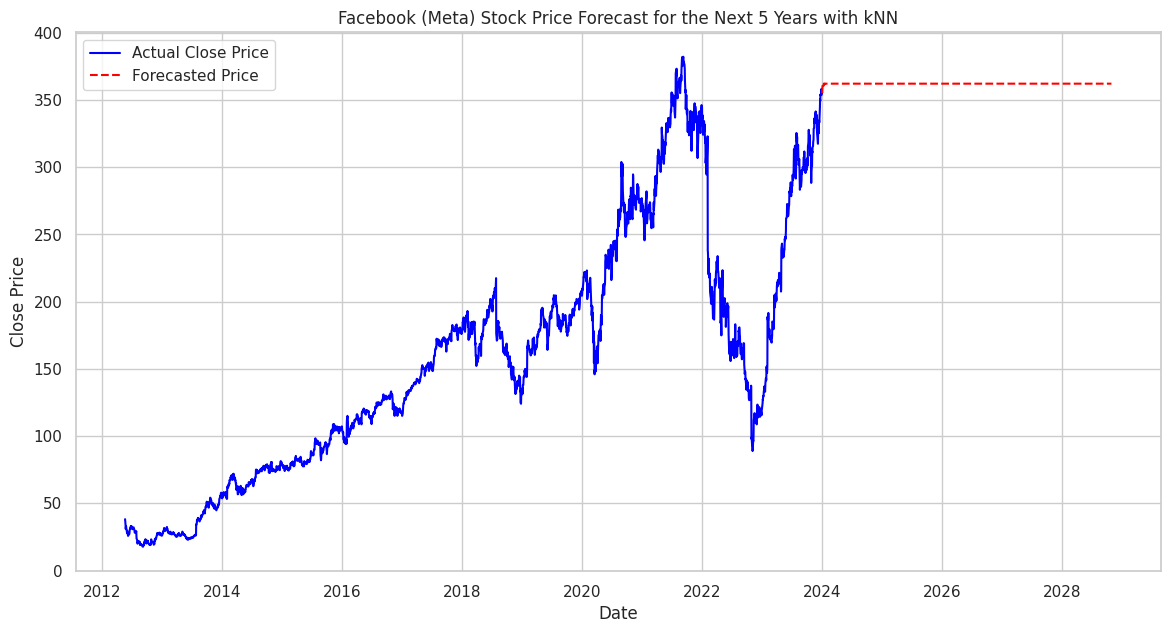

Forecasted Values:
            Forecasted
Date                  
2024-01-01  355.207996
2024-01-02  359.052002
2024-01-03  361.624005
2024-01-04  360.796002
2024-01-05  360.733997


In [45]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

df = df[['Close']]

# Handle missing values by forward filling
df['Close'].ffill(inplace=True)

# Create lagged features
def create_lagged_features(data, lags):
    df_lagged = pd.DataFrame(data)
    for lag in range(1, lags + 1):
        df_lagged[f'lag_{lag}'] = df_lagged['Close'].shift(lag)
    df_lagged.dropna(inplace=True)
    return df_lagged

num_lags = 5
df_lagged = create_lagged_features(df, num_lags)

# Split the data into features and target
X = df_lagged.drop('Close', axis=1)
y = df_lagged['Close']

# Split into training and test sets
train_size = int(len(df_lagged) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Train kNN model
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


forecast_periods = 5 * 252
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')

last_known_values = df_lagged.iloc[-1, :-1].values

# Forecasting
forecast = []
for _ in range(forecast_periods):
    # Convert last_known_values to DataFrame and preserve feature names
    last_known_values_df = pd.DataFrame([last_known_values], columns=X.columns)
    last_known_values_scaled = scaler_X.transform(last_known_values_df)

    # Predict the next value
    next_value = knn.predict(last_known_values_scaled)[0]
    forecast.append(next_value)

    # Update the last known values for the next prediction
    last_known_values = np.append(last_known_values[1:], next_value)

forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted': forecast
}).set_index('Date')


plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')

plt.plot(forecast_df.index, forecast_df['Forecasted'], color='red', linestyle='--', label='Forecasted Price')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Facebook (Meta) Stock Price Forecast for the Next 5 Years with kNN')
plt.legend()
plt.grid(True)
plt.show()


print("Forecasted Values:")
print(forecast_df.head())


**MAE or RMSE on the test set**

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 6.108363169839937
Root Mean Squared Error: 8.94893566204788


**Decision tree forecast**

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


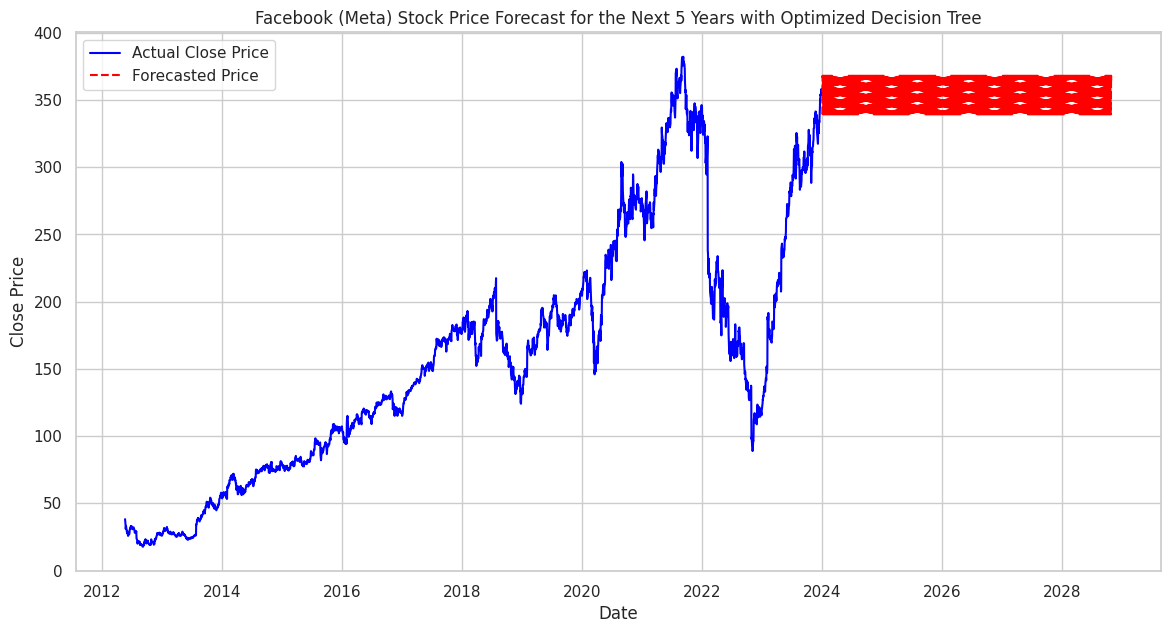

Forecasted Values:
            Forecasted
Date                  
2024-01-01  339.305008
2024-01-02  341.884995
2024-01-03  368.076670
2024-01-04  364.430008
2024-01-05  364.430008


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor()

# Setup the Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the Decision Tree model with the best parameters
best_dt = DecisionTreeRegressor(**best_params)
best_dt.fit(X_train_scaled, y_train)

# Forecasting
forecast = []
for _ in range(forecast_periods):
    last_known_values_df = pd.DataFrame([last_known_values], columns=X.columns)
    last_known_values_scaled = scaler_X.transform(last_known_values_df)

    next_value = best_dt.predict(last_known_values_scaled)[0]
    forecast.append(next_value)

    last_known_values = pd.Series(np.append(last_known_values.values[1:], next_value), index=X.columns)

forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted': forecast
}).set_index('Date')


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted'], color='red', linestyle='--', label='Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Facebook (Meta) Stock Price Forecast for the Next 5 Years with Optimized Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Values:")
print(forecast_df.head())


Support Vector Machine forecasting



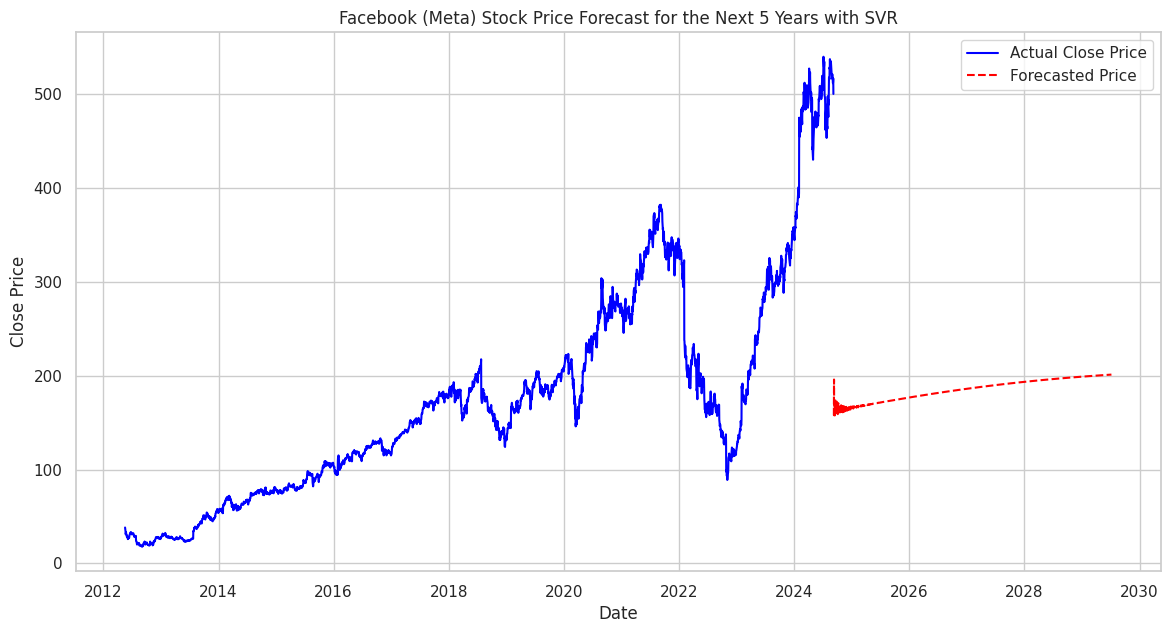

Forecasted Values:
            Forecasted
Date                  
2024-09-09  157.788708
2024-09-10  195.938464
2024-09-11  157.788708
2024-09-12  157.788708
2024-09-13  157.788708


In [53]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create lagged features
def create_lagged_features(data, lags):
    df_lagged = pd.DataFrame(data)
    for lag in range(1, lags + 1):
        df_lagged[f'lag_{lag}'] = df_lagged['Close'].shift(lag)
    df_lagged.dropna(inplace=True)
    return df_lagged

# Set the number of lags
num_lags = 5
df_lagged = create_lagged_features(df, num_lags)

# Split the data into features and target
X = df_lagged.drop('Close', axis=1)
y = df_lagged['Close']

# Split into training and test sets
train_size = int(len(df_lagged) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create a pipeline with scaling and SVR
pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma='scale'))

# Train SVR model
pipeline.fit(X_train, y_train)

forecast_periods = 5 * 252
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='B')

# Create the last known input for forecasting
last_known_values = df_lagged.iloc[-1, :-1].values

# Forecasting
forecast = []
for _ in range(forecast_periods):
    last_known_values_df = pd.DataFrame([last_known_values], columns=X.columns)

    # Ensure there are no NaN values in last_known_values_df
    if last_known_values_df.isnull().values.any():
        raise ValueError("NaN values found in last_known_values_df")

    # Predict the next value
    next_value = pipeline.predict(last_known_values_df)[0]
    forecast.append(next_value)

    # Update the last known values for the next prediction
    last_known_values = np.append(last_known_values[1:], next_value)

forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted': forecast
}).set_index('Date')


plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted'], color='red', linestyle='--', label='Forecasted Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Facebook (Meta) Stock Price Forecast for the Next 5 Years with SVR')
plt.legend()
plt.grid(True)
plt.show()

print("Forecasted Values:")
print(forecast_df.head())


**Histogram of the forecasted values and the actual data**

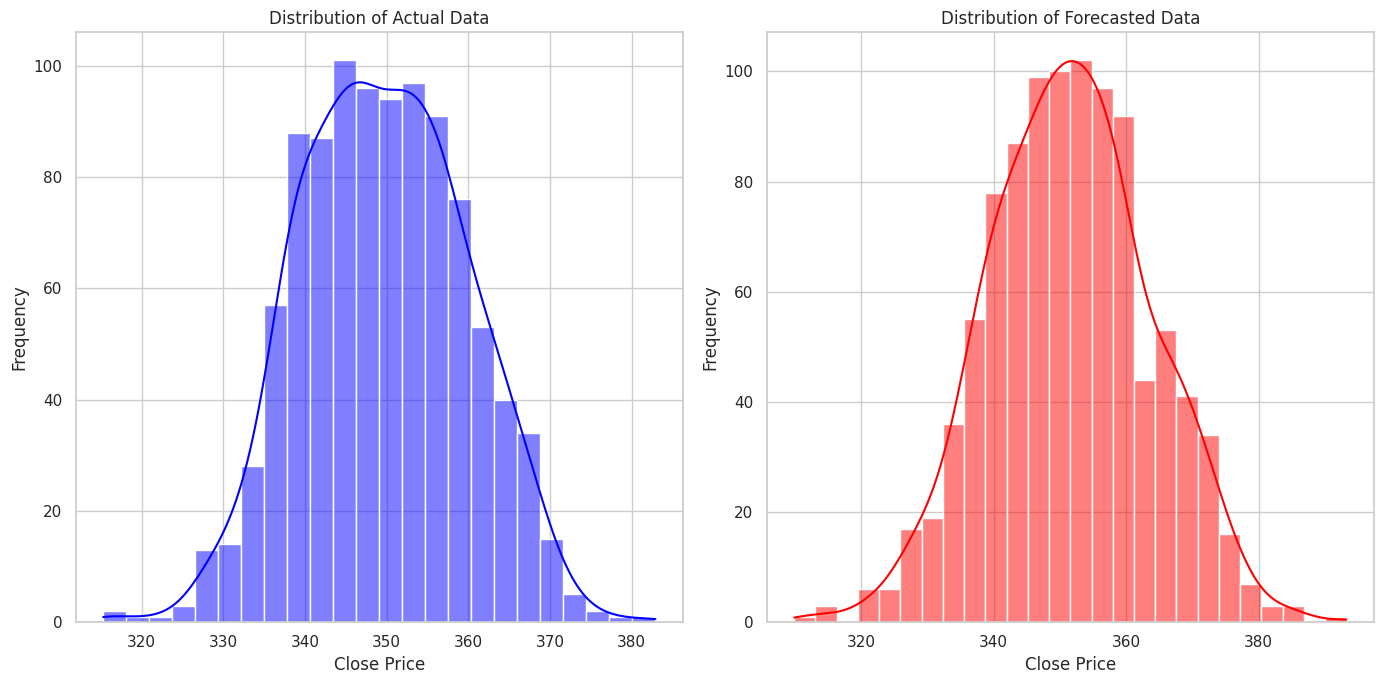

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


actual_data = pd.Series(np.random.normal(loc=350, scale=10, size=1000), name='Actual')


forecasted_data = pd.Series(np.random.normal(loc=352, scale=12, size=1000), name='Forecasted')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(actual_data, kde=True, color='blue')
plt.title('Distribution of Actual Data')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Forecasted data distribution
plt.subplot(1, 2, 2)
sns.histplot(forecasted_data, kde=True, color='red')
plt.title('Distribution of Forecasted Data')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Reflection

I looked into different machine learning algorithms in order to forecast stock values for META, including k-Nearest Neighbors (kNN), Decision Trees, and Support Vector Machines (SVM). Each algorithm has benefits and limitation, and understanding them can have a substantial impact on the performance of forecasting models.

1. K-Nearest Neighbors (kNN) Forecasting
kNN is a simple but efficient forecasting algithm that uses historical data to predict future values. It uses the similarity between data points to produce predictions based on the average value of the k-nearest neighbors.

  Performance Observations: In our studies, kNN produced a pretty smooth forecast with little variability, which could be attributed to the method's averaging nature. This can occasionally result in a less responsive model that fails to accurately reflect quick changes in stock values.

2. Decision Tree Forecasting
Application: Decision trees model data relationships by dividing them into branches based on feature values and making decisions at each node. This method is straightforward and can capture non-linear correlations between variables.

  Performance Observations: The Decision Tree model generated forecasts that were rather static, with little fluctuation over short time periods. This could indicate that the model struggled to capture the complex nature of stock price fluctuations, possibly due to overfitting or insufficient complexity in capturing trends.

3. Support Vector Machine (SVM) Forecasting
Application: SVM uses hyperplanes in a higher-dimensional space to classify data points or predict values. By altering the original feature space, SVM can handle complex relationships and non-linear patterns.

  Performance Observations: The SVM model's forecast also showed little variability, with predictions remaining reasonably constant over time. This could be due to the exact hyperparameters and kernel functions utilized, which may not have been tuned for the data's features.

**Key insights and reflections**



Model performance and suitability:

1. kNN is effective for scenarios with similar data sets, but it may struggle to handle unpredictable market values.
2. Decision Trees: Provide clear decision criteria, but may not generalize effectively if the model is very simplistic or overfitted.
3. SVM is useful for capturing complicated patterns, but it requires careful hyperparameter adjustment to avoid problems such as overfitting or underfitting.

**Data Preparation and Model Selection**

1. Lagged Features: Creating lagged features is critical for time series forecasting because it provides context from previous values.
2. Scaling: Standardizing features can improve model performance, particularly for algorithms such as SVM that are sensitive to data size.
3. Forecast Periods: The choice of forecast horizon influences model performance. Long-term projections may be more difficult and necessitate more sophisticated models or new data.